
# 🎓 PROJET 10 : Recommandation de Voyage Personnalisée

## 🏁 Objectif : L'Agence de Voyage IA
Les voyageurs sont perdus devant trop de choix. Votre mission est de créer une IA capable de **prédire la note** qu'un utilisateur donnera à un voyage.
Cela nous permettra ensuite de lui recommander les destinations (Style + Climat) qui lui correspondent le mieux !

---

## 📋 Programme des 3 Sessions

### 🕵️‍♀️ SESSION 1 : Enquêteur de Données (45 min)
- **Part 1 :** Chargement et Nettoyage (Le budget est parfois inconnu...)
- **Part 2 :** Analyse Exploratoire (Qu'est-ce qui coûte cher ?)

### 🏗️ SESSION 2 : Architecte de Features (45 min)
- **Part 1 :** Feature Engineering (Transformer les mots en chiffres)
- **Part 2 :** Préparation finale pour l'IA

### 🤖 SESSION 3 : Entraîneur d'IA (45 min)
- **Part 1 :** Entraînement du Modèle (Régression)
- **Part 2 :** Évaluation (À quel point nos prédictions sont-elles proches ?)
- **Part 3 :** Bonus (Le Moteur de Recommandation)

---



# 📋 SESSION 1 : From Raw Data to Clean Insights



## 🛠️ Part 1: The Setup
Commençons par charger nos outils et les données.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
df = pd.read_csv('recommandation_voyage.csv')

print("✅ Données chargées avec succès !")
print(f"📊 Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")
df.head()

✅ Données chargées avec succès !
📊 Dimensions : 800 lignes, 6 colonnes


,ID_Utilisateur,Age,Budget_Quotidien,Style_Voyage,Climat_Prefere,Note_Destination
0,1,57,260.72,Cultural,Tropical,2.8
1,2,18,930.00,Cultural,Temperate,3.8
2,3,60,88.62,Adventure,Temperate,1.7
3,4,31,87.50,Adventure,Temperate,2.3
4,5,73,324.90,Cultural,Tropical,1.8



## 🧹 Part 2: The Sanity Check
Regardons si nous avons des trous dans nos données.


ID_Utilisateur       0
Age                  0
Budget_Quotidien    39
Style_Voyage        41
Climat_Prefere       0
Note_Destination     0
dtype: int64


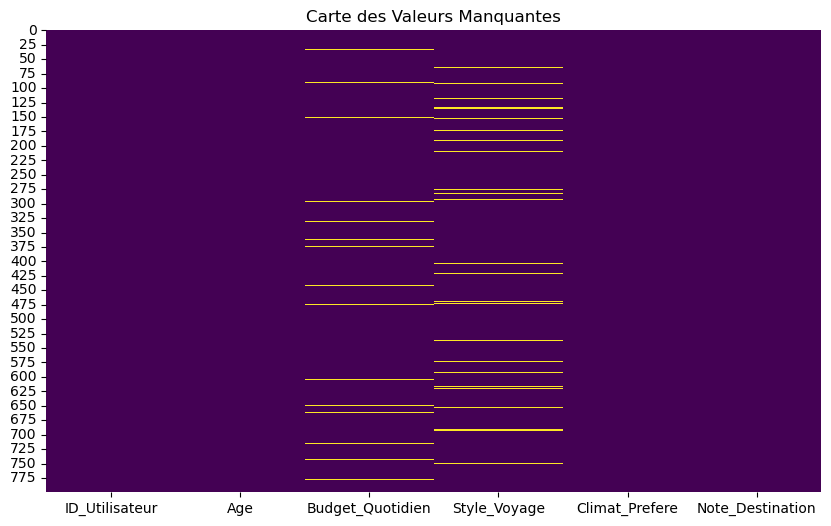

In [2]:

# Vérifions les valeurs manquantes
print(df.isnull().sum())

# Visualisons les manquants
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Carte des Valeurs Manquantes")
plt.show()



> **💡 Tip:** Pour le `Budget_Quotidien` manquant, nous allons le remplacer par la **médiane** (valeur du milieu), car elle est moins sensible aux budgets extrêmes (très riches) que la moyenne.


In [3]:

# Remplacer les valeurs manquantes dans 'Budget_Quotidien' par la médiane
median_budget = df['Budget_Quotidien'].median()
df['Budget_Quotidien'].fillna(median_budget, inplace=True)

# TODO: Faites la même chose pour 'Age' si nécessaire (ou vérifiez qu'il n'y a pas de manquants)
# median_age = ...
# ...

print("✅ Nettoyage terminé !")
print(df.isnull().sum())


✅ Nettoyage terminé !
ID_Utilisateur       0
Age                  0
Budget_Quotidien     0
Style_Voyage        41
Climat_Prefere       0
Note_Destination     0
dtype: int64


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_11612\3367496799.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Budget_Quotidien'].fillna(median_budget, inplace=True)



## 🔍 Part 3: Exploratory Data Analysis (EDA)
Analysons notre cible : **Note_Destination**.


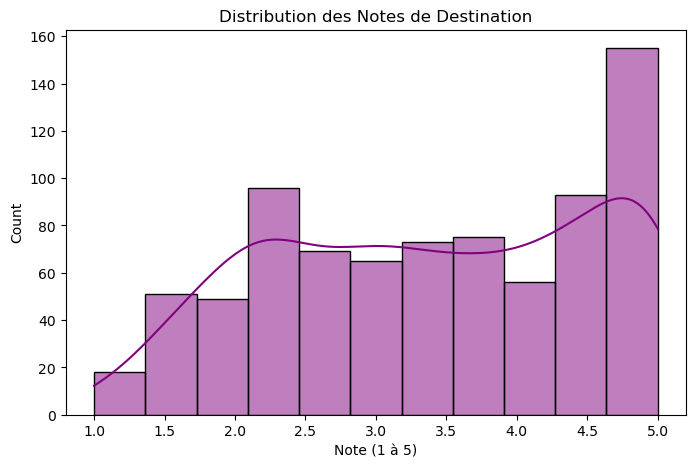

❓ Question : Les gens sont-ils généralement satisfaits (notes > 3) ?


In [4]:

# Distribution des Notes
plt.figure(figsize=(8, 5))
sns.histplot(df['Note_Destination'], kde=True, color='purple')
plt.title("Distribution des Notes de Destination")
plt.xlabel("Note (1 à 5)")
plt.show()

print("❓ Question : Les gens sont-ils généralement satisfaits (notes > 3) ?")



Regardons le lien entre **Budget** et **Note**. L'argent fait-il le bonheur en voyage ?


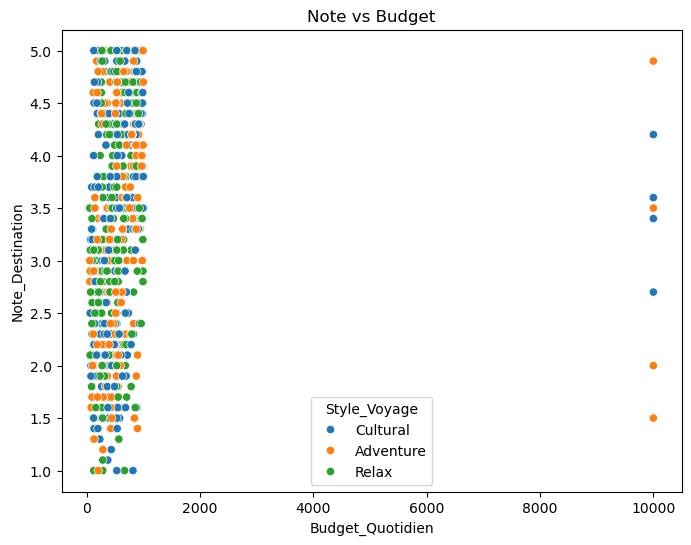

In [5]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Budget_Quotidien', y='Note_Destination', hue='Style_Voyage')
plt.title("Note vs Budget")
plt.show()



# 🏗️ SESSION 2 : The Art of Feature Engineering



### 🏷️ Recipe: Categories
Les colonnes `Style_Voyage` (Adventure, Relax...) et `Climat_Prefere` (Tropical, Cold...) sont du texte.
Transformons-les en colonnes numériques avec le **One-Hot Encoding**.


In [6]:

# Encodage One-Hot
categorical_cols = ['Style_Voyage', 'Climat_Prefere']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("✅ Encodage terminé !")
df_encoded.head()


✅ Encodage terminé !


,ID_Utilisateur,Age,Budget_Quotidien,Note_Destination,Style_Voyage_Cultural,Style_Voyage_Relax,Climat_Prefere_Temperate,Climat_Prefere_Tropical
0,1,57,260.72,2.8,True,False,False,True
1,2,18,930.00,3.8,True,False,True,False
2,3,60,88.62,1.7,False,False,True,False
3,4,31,87.50,2.3,False,False,True,False
4,5,73,324.90,1.8,True,False,False,True



### ➗ Recipe: Math Magic (Log Transformation)
Le `Budget_Quotidien` varie énormément. Certains dépensent 50€, d'autres 10000€ !
Cette grande échelle peut perturber le modèle. Utilisons le **Logarithme** pour "tasser" les grandes valeurs.


AttributeError: Rectangle.set() got an unexpected keyword argument 'title'

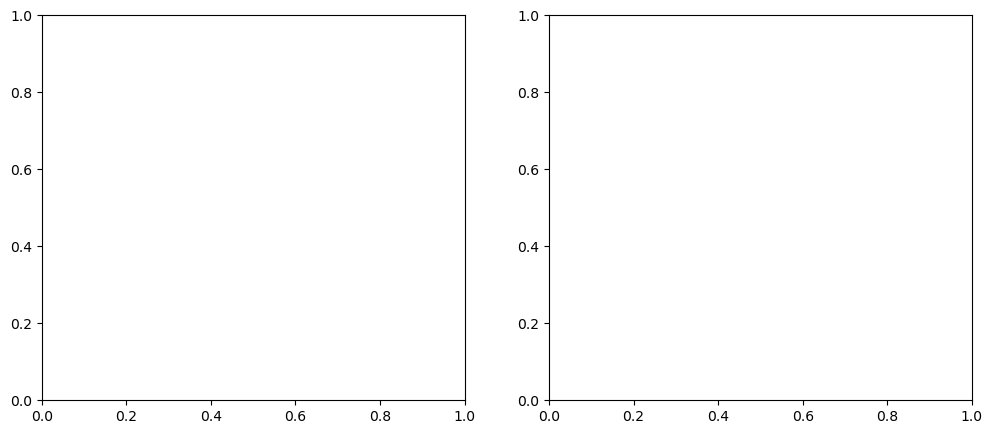

In [7]:

# Création d'une feature Log_Budget
# On ajoute +1 pour éviter log(0) si jamais le budget est 0
df_encoded['Log_Budget'] = np.log1p(df_encoded['Budget_Quotidien'])

# Comparons les distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_encoded['Budget_Quotidien'], ax=ax[0], title='Budget Original')
sns.histplot(df_encoded['Log_Budget'], ax=ax[1], title='Log Budget (Plus normal)')
plt.show()



# 🤖 SESSION 3 : Building & Trusting Your Model



## ✂️ Part 1: The Split


In [ ]:

from sklearn.model_selection import train_test_split

# On utilise Log_Budget au lieu de Budget_Quotidien
X = df_encoded.drop(['ID_Utilisateur', 'Note_Destination', 'Budget_Quotidien'], axis=1)
y = df_encoded['Note_Destination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")



## 🏋️ Part 2: Training (Régression)
Nous voulons prédire une note (nombre continu), donc c'est une **Régression**.
Utilisons `RandomForestRegressor`.


In [ ]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Modèle entraîné !")



## 📊 Part 3: Evaluation
Quelle est l'erreur moyenne de notre modèle ? (MAE : Mean Absolute Error)


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE (Erreur Moyenne) : {mae:.2f} points")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.3f}")

# Visualisons Réalité vs Prédiction
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([1, 5], [1, 5], color='red', linestyle='--') # Ligne parfaite
plt.xlabel("Vraie Note")
plt.ylabel("Note Prédite")
plt.title("Réalité vs Prédiction")
plt.show()



## 🎁 Part 4: Going Further (Bonus)

### 🌟 Bonus Task 1: Le Moteur de Recommandation
Imaginons un nouvel utilisateur. Quel voyage lui recommander ?
Nous allons tester tous les styles/climats possibles pour lui et voir ce que le modèle prédit.


In [ ]:

# Définissons un profil utilisateur
user_age = 30
user_budget = 500
user_log_budget = np.log1p(user_budget)

# Créons des scénarios de voyage (combinaisons possibles)
# Note: Ceci est une simplification. Dans la réalité, on aurait une liste de destinations.
# Ici, on teste "Style" et "Climat".
# Pour simplifier, on va juste prédire pour un cas manuel.

# TODO: Créez un DataFrame avec une ligne représentant :
# Age=30, Log_Budget=..., Style_Voyage_Adventure=1, Climat_Prefere_Tropical=1...
# Et faites model.predict()



### 👥 Bonus Task 2: Tribus de Voyageurs (Clustering)
Pouvons-nous grouper les utilisateurs par budget et âge ?


In [ ]:

from sklearn.cluster import KMeans

# On prend juste Age et Budget
X_cluster = df[['Age', 'Budget_Quotidien']].dropna()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Budget_Quotidien', hue='Cluster', palette='viridis')
plt.title("Tribus de Voyageurs")
plt.show()
